In [1]:
from pydaq import daq_plotter
from pydaq.persisters import RawFormatFileManager, FileDAQModes
from pydaq.plotters import plot_raw_data, plot_channel_data
from pydaq.plotters.utils import *
from matplotlib import pyplot as plt
import logging

from optparse import OptionParser

def plot_file(fname):
    
    plot_type = os.path.basename(fname).split("_")[0]

    parser = OptionParser(usage="usage: %daq_plotter [options]")

    # Plotting modes
    parser.add_option("-R", "--plot_raw_data", action="store_true", dest="plot_raw_data",
                      default=False, help="Plot raw data [default: False]")
    parser.add_option("-C", "--plot_channel_data", action="store_true", dest="plot_channel_data",
                      default=False, help="Plot channelised data [default: False]")
    parser.add_option("-X", "--plot_cont_channel_data", action="store_true", dest="plot_cont_channel_data",
                      default=False, help="Plot continuous channelised data [default: False]")
    parser.add_option("-B", "--plot_beam_data", action="store_true", dest="plot_beam_data",
                      default=False, help="Plot beam data [default: False]")
    parser.add_option("-D", "--plot_integrated_channel_data", action="store_true", dest="plot_integrated_channel_data",
                      default=False, help="Plot integrated channelised data [default: False]")
    parser.add_option("-I", "--plot_integrated_beam_data", action="store_true", dest="plot_integrated_beam_data",
                      default=False, help="Plot integrated beam data [default: False]")
    parser.add_option("-S", "--plot_station_data", action="store_true", dest="plot_station_beam_data",
                      default=False, help="Plot station beam data [default: False]")
    parser.add_option("-K", "--plot_correlated_data", action="store_true", dest="plot_correlated_data",
                      default=False, help="Plot correlated data [default: False]")

    # Plotting parameters
    parser.add_option("-l", "--log", action="store_true", dest="log",
                      default=False, help="Log the data (20log(X)) [default: False]")
    parser.add_option("--plot_type", action="store", dest="plot_type",
                      default="magnitude",  help="Plot type. Options are real, imag, magnitude, power, "
                                                 "waterfall, spectrum (not all options available for all modes) "
                                                 "[default: magnitude]")
    parser.add_option("--separate_plots", action="store_true", dest="separate",
                      help="Plot each antenna/pol in a separate subplot, depending on mode [default: False]")

    parser.add_option("-f", "--file", action="store", dest="file",
                      default=None, help="File to plot [default: None]")
    parser.add_option("-d", "--data_directory", action="store", dest="directory",
                      default=None, help="Data directory [default: None]")
    parser.add_option("--output", action="store", dest="output",
                      default=None, help="Output file prefix [default: None]")
    parser.add_option("-t", "--timestamp", action="store", dest="timestamp", default=None,
                      help="Timestamp to plot, as written in filename [default: Latest file in directory]")
    parser.add_option("--time", action="store_true", dest="time", default=False,
                      help="Show timestamps in axis when possible. EXPERIMENTAL [default: False]")
    parser.add_option("--start_frequency", action="store", dest="frequency", type="float",
                      default=0, help="Frequency of first frequency channel in MHz [default: 0]")
    parser.add_option("-p", "--polarisations", action="store", dest="polarisations",
                      default="all", help="Polarisations to plot [default: All]")
    parser.add_option("-a", "--antennas", action="store", dest="antennas",
                      default="all", help="Antennas to plot [default: All]")
    parser.add_option("-c", "--channels", action="store", dest="channels",
                      default="all", help="Channels to plot [default: All]")
    parser.add_option("-s", "--nof_samples", action="store", dest="nof_samples",
                      type='int', default=1024, help="Number of samples to plot [default: 1024]")
    parser.add_option("-o", "--sample_offset", action="store", dest="sample_offset",
                      type=int, default=0, help="Sample offset [default: 0]")
    parser.add_option("-T", "--tile_id", action="store", dest="tile_id",
                      type=int, default=0, help="Tile ID [default: 0]")
    parser.add_option("", "--station_timestamp_rollover", action="store", dest="rollover",
                      type=int, default=0, help="DO NOT USE. Number of station beam timestamp rollovers [default: 0]")
    parser.add_option("", "--apply_median_filter", action="store_true", dest="median_filter",
                      help="Apply median filter to station beam and integrated tile beam [default: 0]")

    conf, args = parser.parse_args(["-f", fname, "-p", "0", "--separate_plots"])

    # Check if a directory or file were specified
    if conf.directory is None and conf.file is None:
        logging.error("A file or directory must be specified for plotting. Exiting")
        exit()

    # Check if directory exists and whether it contains any HDF5 files
    if conf.directory is not None:
        conf.file = None
        conf.directory = os.path.abspath(os.path.expanduser(conf.directory))
        if not (os.path.exists(conf.directory) and os.path.isdir(conf.directory)):
            logging.error("Specified directory (%s) does not exist or is not a directory. Exiting" % conf.directory)
            exit(0)
        elif len([f for f in os.listdir(conf.directory) if f.endswith("hdf5")]) == 0:
            logging.error("Specified directory (%s) does not contain data files. Exiting" % conf.directory)
            exit(0)

        # Convert and check timestamp, if any
        if conf.timestamp is not None:
            file_time = process_timestamp(conf.timestamp)
            if file_time is None:
                logging.error("Could not process timestamp {}. Exiting".format(conf.timestamp))
                exit()
            conf.timestamp = file_time

    # Sanity checking for specified file
    else:
        # Expand filepath
        conf.file = os.path.abspath(os.path.expanduser(conf.file))
        if not (os.path.exists(conf.file) and os.path.isfile(conf.file)):
            logging.error("Specified file does not exist or is not a file. Exiting")
            exit()

        # Compile file name matching regular expression
        if not get_parameters_from_filename(conf):
            logging.error("Specified file ({}) is not a valid or supported data file. Exiting".format(conf.file))
            exit()

    conf.plot_type = PlotTypes.convert_plot_type(conf.plot_type)
    
    if plot_type == "raw":
        plot_raw_data(conf)
    elif plot_type == "channel":
        plot_channel_data(conf)
    else:
        print(f"{plot_type} not supported")




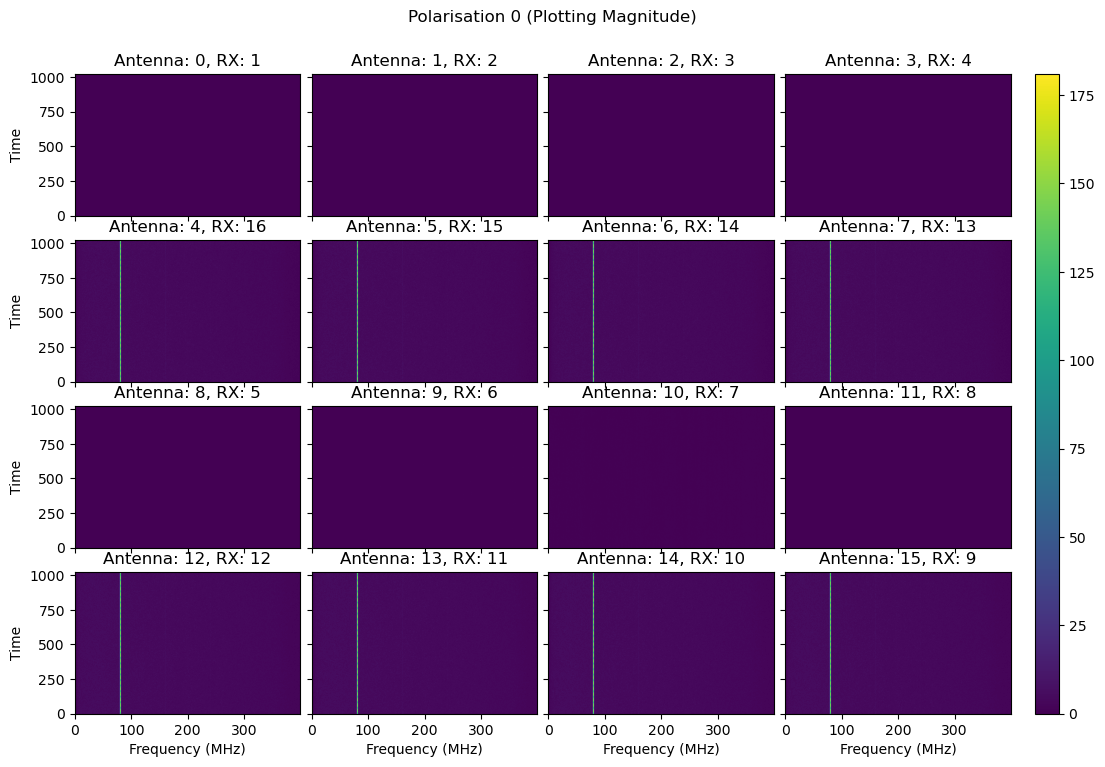

In [4]:
plot_file("daq-data/channel_burst_1_20230119_20384_0.hdf5")